# Erstellen, trainieren und optimieren eines Modells zur Klassifizierung

Daten einlesen

In [71]:
import pandas as pd

data = pd.read_parquet('../data/interim/data_numeric.parquet')

data

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,no_date_spaghetti_throw_away,gender_Female
0,2.0,64,13.0,2.0,50.8333,4.0,2.0,1.0,0.0,0.0,0.1139,0,1
1,4.0,87,15.0,1.0,50.8333,4.0,1.0,0.0,0.0,1.0,0.1139,0,1
2,4.0,73,30.0,1.0,50.8333,4.0,1.0,1.0,0.0,1.0,0.1139,0,0
3,4.0,55,14.0,2.0,50.8333,4.0,NaN,NaN,0.0,2.0,0.0000,1,1
4,4.0,74,24.0,1.0,50.8333,4.0,0.0,0.0,0.0,1.0,0.1139,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26596,1.0,42,18.0,1.0,45.1667,15.5,1.0,1.0,0.0,2.0,0.0000,0,1
26597,4.0,37,19.0,4.0,45.1667,15.5,0.0,0.0,2.0,1.0,0.3200,1,0
26598,4.0,61,25.0,4.0,45.1667,15.5,2.0,NaN,2.0,1.0,0.3645,0,0
26599,4.0,57,23.0,2.0,45.1667,15.5,0.0,2.0,0.0,1.0,0.1139,1,1


Zeilen mit leeren Werten (NaN) entfernen

In [72]:
data = data.dropna()
data

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,no_date_spaghetti_throw_away,gender_Female
0,2.0,64,13.0,2.0,50.8333,4.0,2.0,1.0,0.0,0.0,0.1139,0,1
1,4.0,87,15.0,1.0,50.8333,4.0,1.0,0.0,0.0,1.0,0.1139,0,1
2,4.0,73,30.0,1.0,50.8333,4.0,1.0,1.0,0.0,1.0,0.1139,0,0
4,4.0,74,24.0,1.0,50.8333,4.0,0.0,0.0,0.0,1.0,0.1139,1,1
5,4.0,21,18.0,2.0,50.8333,4.0,0.0,0.0,1.0,1.0,0.2850,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26594,4.0,28,18.0,1.0,45.1667,15.5,0.0,0.0,2.0,1.0,0.3645,0,1
26596,1.0,42,18.0,1.0,45.1667,15.5,1.0,1.0,0.0,2.0,0.0000,0,1
26597,4.0,37,19.0,4.0,45.1667,15.5,0.0,0.0,2.0,1.0,0.3200,1,0
26599,4.0,57,23.0,2.0,45.1667,15.5,0.0,2.0,0.0,1.0,0.1139,1,1


Klassifizierungsvariable entfernen

In [73]:
labels = data['no_date_spaghetti_throw_away']
labels

0        0
1        0
2        0
4        1
5        0
        ..
26594    0
26596    0
26597    1
26599    1
26600    1
Name: no_date_spaghetti_throw_away, Length: 22636, dtype: uint8

In [74]:
data = data.drop(columns='no_date_spaghetti_throw_away')
data

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,gender_Female
0,2.0,64,13.0,2.0,50.8333,4.0,2.0,1.0,0.0,0.0,0.1139,1
1,4.0,87,15.0,1.0,50.8333,4.0,1.0,0.0,0.0,1.0,0.1139,1
2,4.0,73,30.0,1.0,50.8333,4.0,1.0,1.0,0.0,1.0,0.1139,0
4,4.0,74,24.0,1.0,50.8333,4.0,0.0,0.0,0.0,1.0,0.1139,1
5,4.0,21,18.0,2.0,50.8333,4.0,0.0,0.0,1.0,1.0,0.2850,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26594,4.0,28,18.0,1.0,45.1667,15.5,0.0,0.0,2.0,1.0,0.3645,1
26596,1.0,42,18.0,1.0,45.1667,15.5,1.0,1.0,0.0,2.0,0.0000,1
26597,4.0,37,19.0,4.0,45.1667,15.5,0.0,0.0,2.0,1.0,0.3200,0
26599,4.0,57,23.0,2.0,45.1667,15.5,0.0,2.0,0.0,1.0,0.1139,1


In [75]:
labels.value_counts()

0    16728
1     5908
Name: no_date_spaghetti_throw_away, dtype: int64

Daten skalieren

Labels in eine NumPy Variable schreiben

In [77]:
y = labels.values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

# Train-Test-Splitting

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

len(X_train)/len(X)

0.7999646580667963

In [79]:
pd.Series(y_train).value_counts(normalize=True)

0    0.73901
1    0.26099
dtype: float64

In [80]:
pd.Series(y_test).value_counts(normalize=True)

0    0.738958
1    0.261042
dtype: float64

# Entscheidungsbaummodell

In [81]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(697.5, 815.4, 'best_before_meaning_map <= -0.668\ngini = 0.386\nsamples = 18108\nvalue = [13382, 4726]\nclass = nicht wegwerfen'),
 Text(348.75, 634.2, 'validity_meaning_map <= -0.437\ngini = 0.492\nsamples = 5071\nvalue = [2865, 2206]\nclass = nicht wegwerfen'),
 Text(174.375, 453.0, 'cntrylat <= -0.405\ngini = 0.5\nsamples = 3496\nvalue = [1782, 1714]\nclass = nicht wegwerfen'),
 Text(87.1875, 271.80000000000007, 'cntrylon <= 0.501\ngini = 0.496\nsamples = 1806\nvalue = [824, 982]\nclass = wegwerfen'),
 Text(43.59375, 90.60000000000002, '\n  (...)  \n'),
 Text(130.78125, 90.60000000000002, '\n  (...)  \n'),
 Text(261.5625, 271.80000000000007, 'cntrylon <= -0.806\ngini = 0.491\nsamples = 1690\nvalue = [958, 732]\nclass = nicht wegwerfen'),
 Text(217.96875, 90.60000000000002, '\n  (...)  \n'),
 Text(305.15625, 90.60000000000002, '\n  (...)  \n'),
 Text(523.125, 453.0, 'cntrylat <= -0.31\ngini = 0.43\nsamples = 1575\nvalue = [1083, 492]\nclass = nicht wegwerfen'),
 Text(435.9375, 

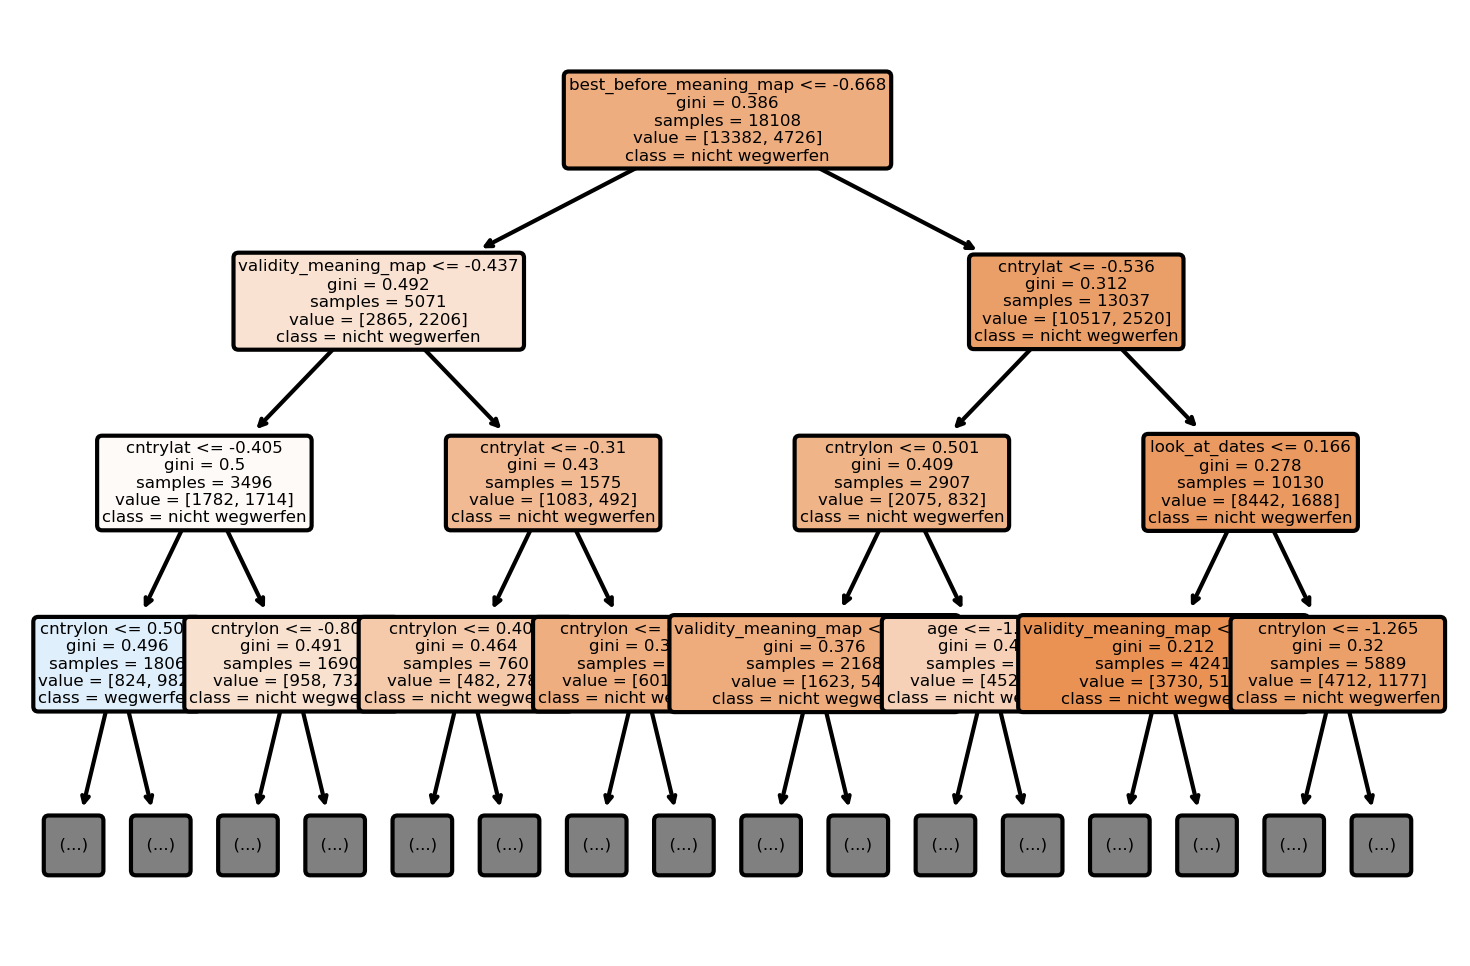

In [89]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# Größe des Plots festlegen
plt.figure(dpi=300)

plot_tree(
    model_dt,
    max_depth=3,
    feature_names = data.columns,
    class_names = ['nicht wegwerfen','wegwerfen'],
    rounded=True,
    filled=True,
    fontsize=4
)

In [91]:
from sklearn.metrics import classification_report
y_predicted_test_dt = model_dt.predict(X_test)
print(classification_report(y_test,y_predicted_test_dt))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      3346
           1       0.35      0.38      0.36      1182

    accuracy                           0.65      4528
   macro avg       0.56      0.56      0.56      4528
weighted avg       0.66      0.65      0.66      4528



In [94]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_predicted_test_rf = model_rf.predict(X_test)
print(classification_report(y_test,y_predicted_test_rf))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84      3346
           1       0.48      0.23      0.31      1182

    accuracy                           0.74      4528
   macro avg       0.63      0.57      0.57      4528
weighted avg       0.70      0.74      0.70      4528



In [95]:
pd.Series(model_rf.feature_importances_, index=data.columns).sort_values(ascending=False)

age                        0.216537
age_stop_edu               0.159424
cntrylat                   0.094575
cntrylon                   0.084097
household_size             0.083676
salary                     0.082515
best_before_meaning_map    0.068256
population_density         0.050221
validity_meaning_map       0.049476
look_at_dates              0.044679
gender_Female              0.034008
work_scale                 0.032536
dtype: float64

In [96]:
from sklearn.model_selection import StratifiedKFold

cv_splitter = StratifiedKFold(shuffle=True, random_state=42)
splits = cv_splitter.split(X, y)
for train_index, test_index in splits:
    print('Zeilen in Training und Testing: ', len(train_index), len(test_index))

Zeilen in Training und Testing:  18108 4528
Zeilen in Training und Testing:  18109 4527
Zeilen in Training und Testing:  18109 4527
Zeilen in Training und Testing:  18109 4527
Zeilen in Training und Testing:  18109 4527


In [97]:
from sklearn.model_selection import cross_validate

model = RandomForestClassifier()
scores = cross_validate(model, X, y, cv=cv_splitter, scoring=['f1','precision','recall'])

scores

{'fit_time': array([2.76217985, 2.03631592, 2.44614553, 3.00046968, 2.60314894]),
 'score_time': array([0.1627748 , 0.16268897, 0.15410042, 0.16924095, 0.12227607]),
 'test_f1': array([0.30990783, 0.31766055, 0.3308007 , 0.33258679, 0.32747875]),
 'test_precision': array([0.48555957, 0.4920071 , 0.53396226, 0.49172185, 0.49571184]),
 'test_recall': array([0.22758037, 0.23454699, 0.23962743, 0.25126904, 0.24450085])}

In [98]:
scores['test_f1'].mean()

0.32368692511192787

In [102]:
model = RandomForestClassifier(max_depth=10)
scores = cross_validate(model, X, y, cv=cv_splitter, scoring=['f1','precision','recall'])
scores['test_f1'].mean()

0.27751399599004234

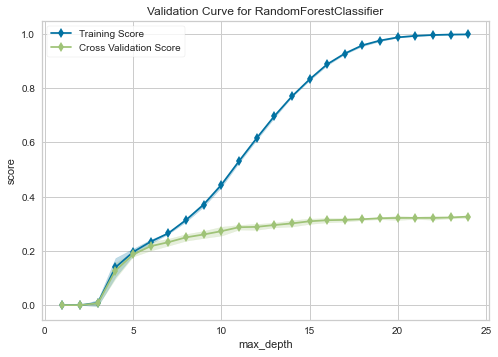

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [105]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    model,
    param_name="max_depth",
    param_range=range(1,25),
    # range(1,10) heißt 1-9 x)
    cv=cv_splitter,
    scoring="f1"
)
viz.fit(X, y)
viz.show()